# Brazilian Soccer - CRISP-DM process
I chose to analyze data on Brazilian (where I'm from) soccer matches, which I got at https://www.football-data.co.uk/brazil.php

## Business Understanding
Having been born in Brazil, I'm stereotipically very passionate about soccer aand watch games from Brazil's league every week. I'm curious to see what I can learn from this data about the league and potentially even create a model to make predictions.

Questions I will explore:
* What interesting statistics can we learn about the different Brazilian teams over the last few years? Who won the most? Who accumulated the most amount of points? Who scored the most goals?
* How well can we predict the results of a new season based on previous seasons' results?
* How well can we predict the results of a game based on the results of the current season? Is there a minimum number of games in a season that starts making the predictions more accurate?
* How good are betters in determining the winning team? In other words, how well can we use betting statistics for the match to predict the results?

## Data Understanding

### Basic Exploratory Data Analysis
I'll start by exploring some aspects of the data to better understand what we have available.

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('./Soccer Data Brazil/BRA.csv')
df.Date = pd.to_datetime(df.Date, dayfirst=True)
df.head()

,Country,League,Season,Date,Time,Home,Away,HG,AG,Res,PH,PD,PA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA
0,Brazil,Serie A,2012,2012-05-19,22:30,Palmeiras,Portuguesa,1.0,1.0,D,1.75,3.86,5.25,1.76,3.87,5.31,1.69,3.50,4.90
1,Brazil,Serie A,2012,2012-05-19,22:30,Sport Recife,Flamengo RJ,1.0,1.0,D,2.83,3.39,2.68,2.83,3.42,2.70,2.59,3.23,2.58
2,Brazil,Serie A,2012,2012-05-20,01:00,Figueirense,Nautico,2.0,1.0,H,1.60,4.04,6.72,1.67,4.05,7.22,1.59,3.67,5.64
3,Brazil,Serie A,2012,2012-05-20,20:00,Botafogo RJ,Sao Paulo,4.0,2.0,H,2.49,3.35,3.15,2.49,3.39,3.15,2.35,3.26,2.84
4,Brazil,Serie A,2012,2012-05-20,20:00,Corinthians,Fluminense,0.0,1.0,A,1.96,3.53,4.41,1.96,3.53,4.41,1.89,3.33,3.89


In [2]:
df.shape

(4530, 19)

In [3]:
df.columns

Index(['Country', 'League', 'Season', 'Date', 'Time', 'Home', 'Away', 'HG',
       'AG', 'Res', 'PH', 'PD', 'PA', 'MaxH', 'MaxD', 'MaxA', 'AvgH', 'AvgD',
       'AvgA'],
      dtype='object')

From the source's website notes (https://www.football-data.co.uk/notes.txt), we know the following:
* HG = Full Time Home Team Goals
* AG = Full Time Away Team Goals
* Res = Full Time Result (H=Home Win, D=Draw, A=Away Win)

The data below corresponds to betting data:
* PH = Pinnacle home win odds 
* PD = Pinnacle draw odds
* PA = Pinnacle away win odds
* MaxH = Market maximum home win odds
* MaxD = Market maximum draw win odds
* MaxA = Market maximum away win odds
* AvgH = Market average home win odds
* AvgD = Market average draw win odds
* AvgA = Market average away win odds

In [4]:
def check_nulls_columns(df, level):
    """Returns all columns with more than level % of values null"""
    aux = pd.DataFrame(df.isnull().sum()/df.shape[0], columns = ['Level'])
    columns = list(aux[aux['Level'] > level].index)
    return columns

In [5]:
for level in [0.3, 0.5, 0.7, 0.9]:
    print(f'The columns that have more than {100*level}% values null are: {check_nulls_columns(df, level)}')

The columns that have more than 30.0% values null are: []
The columns that have more than 50.0% values null are: []
The columns that have more than 70.0% values null are: []
The columns that have more than 90.0% values null are: []


In [6]:
any_null = df.shape[0] - df.dropna(axis=0, how='any').shape[0]
all_null = df.shape[0] - df.dropna(axis=0, how='all').shape[0]
print(f'The number of rows with at least one null value is {any_null}')
print(f'The number of rows with all null value is {all_null}')

The number of rows with at least one null value is 1
The number of rows with all null value is 0


In [13]:
df[df.isnull().any(axis=1)]

,Country,League,Season,Date,Time,Home,Away,HG,AG,Res,PH,PD,PA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA
1891,Brazil,Serie A,2016,11/12/2016,19:00,Chapecoense-SC,Atletico-MG,NaN,NaN,NaN,NaN,NaN,NaN,2.85,3.3,2.68,2.85,3.3,2.67


Looks like there's only one row with a null value, missing the game's results. Upon research, I found out this game was cancelled because the Chapecoense team suffered a terrible airplane accident and tragically lost most of their players. We'll delete this row since it can't be used to predict the results.

In [205]:
df.dropna(axis=0, how='any', inplace=True)

### Understanding the data and learning from it.
Now that we understand the data, its attributes, and have done some basic data cleaning, 
we can start to analyze the different statistics from the data to understand it deeper and learn interesting things.

We'll explore the following questions:
* What interesting statistics can we learn about the different Brazilian teams over the last few years? 
* Who won/lost the most? 
* Who accumulated the most amount of points? 
* Who scored the most goals?

In [15]:
for idx, row in pd.DataFrame(df.dtypes).iterrows():
    print(f'{idx} - {row.values[0]}')

Country - object
League - object
Season - int64
Date - object
Time - object
Home - object
Away - object
HG - float64
AG - float64
Res - object
PH - float64
PD - float64
PA - float64
MaxH - float64
MaxD - float64
MaxA - float64
AvgH - float64
AvgD - float64
AvgA - float64


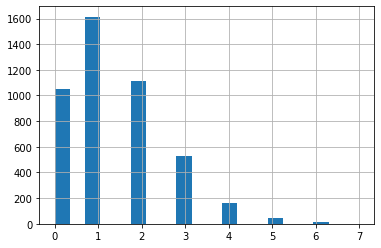

In [25]:
df.HG.hist(bins=20)

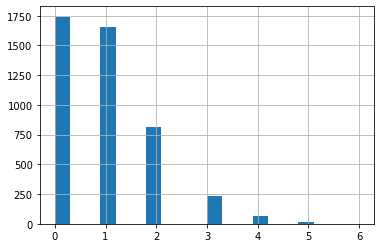

In [26]:
df.AG.hist(bins=20)

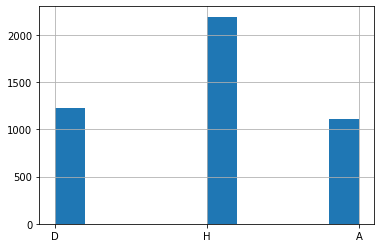

In [30]:
df.Res.hist()

From the numbers above, we can already come to some conclusions that are intuitive to most soccer fans:
* Teams that are playing at their home tend to score more goals, which is noticeable from the absolute numbers, as well as the difference in skillness of the curve of home goals and away goals
* Teams thar are playing at their home tend to win more. This is usually explained by having their fans there to support them and/or knowing the field better

Next we'll create a new dataset to help us answer other questions. This dataset will have in each row the following data: season, team, points (W=3, Draw=1), # wins, # draws, # losses, # goals scored, # goals suffered

In [61]:
aux = pd.DataFrame(columns=['Season', 'Team', 'Points', 'Wins', 'Draws', 'Losses', 'Scored', 'Suffered'])
teams = df[['Season', 'Home']].drop_duplicates()

for idx, row in teams.iterrows():
    aux = aux.append(dict(Season=row.Season, Team=row.Home, Points=0, Wins=0, Draws=0, Losses=0, Scored=0, Suffered=0),
                    ignore_index=True)

for idx, row in df.iterrows():
    if row.Res == 'H':
        aux.loc[(aux.Season==row.Season) & (aux.Team==row.Home), 'Points']+=3
        aux.loc[(aux.Season==row.Season) & (aux.Team==row.Home), 'Wins']+=1
        aux.loc[(aux.Season==row.Season) & (aux.Team==row.Away), 'Losses']+=1
    elif row.Res == 'A':
        aux.loc[(aux.Season==row.Season) & (aux.Team==row.Away), 'Points']+=3
        aux.loc[(aux.Season==row.Season) & (aux.Team==row.Away), 'Wins']+=1
        aux.loc[(aux.Season==row.Season) & (aux.Team==row.Home), 'Losses']+=1
    else:
        aux.loc[(aux.Season==row.Season) & (aux.Team==row.Home), 'Points']+=1
        aux.loc[(aux.Season==row.Season) & (aux.Team==row.Away), 'Points']+=1
        aux.loc[(aux.Season==row.Season) & (aux.Team==row.Home), 'Draws']+=1
        aux.loc[(aux.Season==row.Season) & (aux.Team==row.Away), 'Draws']+=1
    
    aux.loc[(aux.Season==row.Season) & (aux.Team==row.Home), 'Scored']+=row.HG
    aux.loc[(aux.Season==row.Season) & (aux.Team==row.Away), 'Suffered']+=row.HG
    aux.loc[(aux.Season==row.Season) & (aux.Team==row.Home), 'Suffered']+=row.AG
    aux.loc[(aux.Season==row.Season) & (aux.Team==row.Away), 'Scored']+=row.AG

In [76]:
# We can check the data and compare it with actual results 
aux[aux.Season==2023].sort_values(by='Points', ascending=False)

,Season,Team,Points,Wins,Draws,Losses,Scored,Suffered
228,2023,Flamengo RJ,63,18,9,8,54,37
221,2023,Palmeiras,63,18,9,8,58,32
223,2023,Botafogo RJ,62,18,8,9,56,33
226,2023,Atletico-MG,60,17,9,9,46,27
224,2023,Bragantino,59,16,11,8,46,31
229,2023,Gremio,59,18,5,12,57,53
230,2023,Fluminense,53,15,8,12,46,43
222,2023,Athletico-PR,52,13,13,9,47,39
231,2023,Cuiaba,48,13,9,13,36,35
232,2023,Sao Paulo,47,12,11,12,37,36


### Who accumulated the most amount of points? 

In [69]:
aux.groupby('Team').sum().Points.sort_values(ascending=False)

Team
Flamengo RJ       756
Atletico-MG       753
Corinthians       701
Palmeiras         692
Sao Paulo         691
Santos            673
Gremio            672
Fluminense        660
Internacional     635
Cruzeiro          504
Botafogo RJ       498
Bahia             407
Coritiba          378
Vasco             374
Sport Recife      366
Atletico-PR       334
Goias             314
Chapecoense-SC    287
Athletico-PR      274
Fortaleza         252
Ponte Preta       228
Ceara             222
Vitoria           222
Bragantino        212
Atletico GO       205
America MG        195
Figueirense       157
Avai              140
Cuiaba            136
Portuguesa         93
Criciuma           78
Nautico            69
Juventude          68
CSA                32
Joinville          31
Santa Cruz         31
Parana             23
Name: Points, dtype: int64

#### Who won/lost the most? 

In [70]:
aux.groupby('Team').sum().Wins.sort_values(ascending=False)

Team
Flamengo RJ       215
Atletico-MG       212
Palmeiras         198
Gremio            188
Corinthians       186
Sao Paulo         186
Santos            182
Fluminense        182
Internacional     172
Cruzeiro          138
Botafogo RJ       136
Bahia             103
Coritiba           98
Sport Recife       96
Vasco              95
Atletico-PR        94
Goias              82
Athletico-PR       75
Chapecoense-SC     70
Fortaleza          69
Ponte Preta        59
Vitoria            58
Bragantino         54
Ceara              52
Atletico GO        49
America MG         49
Figueirense        39
Cuiaba             33
Avai               33
Portuguesa         22
Criciuma           20
Nautico            19
Juventude          14
CSA                 8
Santa Cruz          8
Joinville           7
Parana              4
Name: Wins, dtype: int64

In [71]:
aux.groupby('Team').sum().Draws.sort_values(ascending=False)

Team
Corinthians       143
Sao Paulo         133
Santos            127
Internacional     119
Atletico-MG       117
Fluminense        114
Flamengo RJ       111
Gremio            108
Palmeiras          98
Bahia              98
Botafogo RJ        90
Cruzeiro           90
Vasco              89
Coritiba           84
Sport Recife       78
Chapecoense-SC     77
Goias              68
Ceara              66
Atletico GO        58
Atletico-PR        52
Ponte Preta        51
Bragantino         50
Athletico-PR       49
Vitoria            48
America MG         48
Fortaleza          45
Avai               41
Figueirense        40
Cuiaba             37
Portuguesa         27
Juventude          26
Criciuma           18
Nautico            12
Parana             11
Joinville          10
CSA                 8
Santa Cruz          7
Name: Draws, dtype: int64

In [72]:
aux.groupby('Team').sum().Losses.sort_values(ascending=False)

Team
Fluminense        157
Coritiba          157
Botafogo RJ       151
Santos            144
Bahia             138
Sao Paulo         134
Sport Recife      130
Flamengo RJ       127
Internacional     124
Corinthians       124
Atletico-MG       123
Palmeiras         119
Gremio            119
Chapecoense-SC    118
Vasco             117
Goias             113
Cruzeiro          111
America MG         90
Vitoria            84
Atletico GO        83
Atletico-PR        82
Ponte Preta        80
Avai               78
Figueirense        73
Fortaleza          73
Ceara              72
Athletico-PR       63
Nautico            45
Bragantino         45
Cuiaba             41
Criciuma           38
Juventude          36
Portuguesa         27
Parana             23
Santa Cruz         23
CSA                22
Joinville          21
Name: Losses, dtype: int64

Interestingly, teams that show up as winning the most also show up as losing the most, like Fluminense and Flamengo. This happens because teams that underperform are demoted and don't play the league the following year. Because the teams that tend to win the most tend to not be demoted, they also play more and have more opportunities to lose.

#### Who scored the most goals?

In [74]:
aux.groupby('Team').sum().Scored.sort_values(ascending=False)

Team
Flamengo RJ       670.0
Atletico-MG       665.0
Palmeiras         614.0
Santos            578.0
Fluminense        572.0
Sao Paulo         569.0
Gremio            548.0
Corinthians       541.0
Internacional     519.0
Botafogo RJ       432.0
Cruzeiro          424.0
Bahia             372.0
Coritiba          361.0
Vasco             317.0
Sport Recife      313.0
Atletico-PR       288.0
Goias             286.0
Chapecoense-SC    261.0
Vitoria           233.0
Athletico-PR      225.0
Fortaleza         214.0
Bragantino        200.0
Ponte Preta       200.0
Ceara             195.0
Atletico GO       187.0
America MG        173.0
Figueirense       142.0
Avai              119.0
Cuiaba            101.0
Portuguesa         89.0
Criciuma           77.0
Nautico            66.0
Juventude          65.0
Santa Cruz         45.0
Joinville          26.0
CSA                24.0
Parana             18.0
Name: Scored, dtype: float64

In [75]:
aux.groupby('Team').sum().Suffered.sort_values(ascending=False)

Team
Fluminense        525.0
Atletico-MG       494.0
Flamengo RJ       491.0
Santos            486.0
Sao Paulo         471.0
Coritiba          468.0
Botafogo RJ       449.0
Palmeiras         438.0
Internacional     431.0
Corinthians       425.0
Bahia             419.0
Gremio            414.0
Vasco             400.0
Sport Recife      397.0
Goias             363.0
Cruzeiro          359.0
Chapecoense-SC    359.0
Vitoria           281.0
Atletico GO       261.0
America MG        256.0
Atletico-PR       251.0
Ponte Preta       243.0
Avai              230.0
Figueirense       219.0
Fortaleza         219.0
Ceara             209.0
Athletico-PR      200.0
Bragantino        176.0
Nautico           130.0
Criciuma          119.0
Cuiaba            114.0
Juventude         113.0
Portuguesa         87.0
Santa Cruz         69.0
CSA                58.0
Parana             57.0
Joinville          48.0
Name: Suffered, dtype: float64

## Preparing the data
Luckily, this dataset is pretty clean already - the only row with nulls could be deleted given the context. We'll have to prepare the data in the following ways:
* Categorical variables --> The "Res" column has categorical values, which we'll create dummies for
* Prediction model --> we may want to manipulate the data so it's easy to use results from multiple past games when trying to predict upcoming results

We'll do these modifications as needed on the next section

## Modeling
We want to answer the following questions:
* How well can we predict the results of a new season based on previous seasons' results?
* How good are betters in determining the winning team? In other words, how well can we use betting statistics for the match to predict the results?

### How well can we predict the results of a new season based on previous seasons' results?
In answering the first question, we'll create a model that tries to predict the results of the first game of the season using the final results of the previous season.
* X: final season result (full championship)
* y: first result of following season (first round)

In [166]:
# Data Wrangling
df["Rank"] = df[["Date", "Home"]].apply(tuple,axis=1)\
             .rank(method='dense',ascending=True).astype(int)

firsts = df[((np.ceil(df.Rank / 10) % 38)==1)]

df1 = pd.DataFrame(columns=['Home', 'Away', 'PointsH', 'WinsH', 'DrawsH', 'LossesH', 'ScoredH', 'SufferedH', \
                            'PointsA', 'WinsA', 'DrawsA', 'LossesA', 'ScoredA', 'SufferedA', 'GoalsHA', 'HomeWon'])

for idx, row in firsts.sort_values(by='Rank').iterrows():
#     df1 = df1.append(dict(Season=row.Season, Team=row.Home, Points=0, Wins=0, Draws=0, Losses=0, Scored=0, Suffered=0),
#                     ignore_index=True)
#     try:    
#         df1.loc[(df1.Season==row.Season) & (aux.Team==row.Away), 'Scored']+=row.AG
#     except:
    if row.Season==2012:
        continue
    try:
        PointsH, WinsH, DrawsH, LossesH, ScoredH, SufferedH = \
            aux[(aux.Team == row.Home) & (aux.Season == row.Season-1)]\
            [['Points', 'Wins', 'Draws', 'Losses', 'Scored', 'Suffered']].values[0]
        PointsA, WinsA, DrawsA, LossesA, ScoredA, SufferedA = \
            aux[(aux.Team == row.Home) & (aux.Season == row.Season-1)]\
            [['Points', 'Wins', 'Draws', 'Losses', 'Scored', 'Suffered']].values[0]
        if row.HG - row.AG > 0:
            HomeWon = 1
        elif row.HG - row.AG == 0:
            HomeWon = 0
        else:
            HomeWon = -1
        df1 = df1.append(dict(Home=row.Home, 
                              Away=row.Away, 
                              PointsH=PointsH, 
                              WinsH=WinsH, 
                              DrawsH=DrawsH, 
                              LossesH=LossesH, 
                              ScoredH=ScoredH, 
                              SufferedH=SufferedH,
                              PointsA=PointsA, 
                              WinsA=WinsA, 
                              DrawsA=DrawsA, 
                              LossesA=LossesA, 
                              ScoredA=ScoredA, 
                              SufferedA=SufferedA,
                              GoalsHA=(row.HG - row.AG),
                              HomeWon=HomeWon),
                            ignore_index=True)
    except: #skips seasons that it can't find previously (because team didn't play main league)
        continue

df1.tail(20)

,Home,Away,PointsH,WinsH,DrawsH,LossesH,ScoredH,SufferedH,PointsA,WinsA,DrawsA,LossesA,ScoredA,SufferedA,GoalsHA,HomeWon
67,Corinthians,Atletico GO,51,13,12,13,45.0,45.0,51,13,12,13,45.0,45.0,-1.0,-1
68,Flamengo RJ,Palmeiras,71,21,8,9,68.0,48.0,71,21,8,9,68.0,48.0,1.0,1
69,Sao Paulo,Fluminense,66,18,12,8,59.0,41.0,66,18,12,8,59.0,41.0,0.0,0
70,Internacional,Sport Recife,70,20,10,8,61.0,35.0,70,20,10,8,61.0,35.0,0.0,0
71,Atletico GO,Flamengo RJ,53,13,14,11,33.0,36.0,53,13,14,11,33.0,36.0,0.0,0
72,Fluminense,Santos,54,15,9,14,38.0,38.0,54,15,9,14,38.0,38.0,0.0,0
73,Atletico-MG,Internacional,84,26,6,6,67.0,34.0,84,26,6,6,67.0,34.0,2.0,1
74,Fortaleza,Cuiaba,58,17,7,14,44.0,45.0,58,17,7,14,44.0,45.0,-1.0,-1
75,Palmeiras,Ceara,66,20,6,12,58.0,43.0,66,20,6,12,58.0,43.0,-1.0,-1
76,Sao Paulo,Athletico-PR,48,11,15,12,31.0,39.0,48,11,15,12,31.0,39.0,4.0,1


In [148]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [161]:
X = df1[['PointsH', 'WinsH', 'DrawsH', 'LossesH', 'ScoredH', 'SufferedH', \
                            'PointsA', 'WinsA', 'DrawsA', 'LossesA', 'ScoredA', 'SufferedA']]
y = df1[['GoalsHA']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
lm_model = LinearRegression(normalize=True)
lm_model.fit(X_train, y_train)

y_preds = lm_model.predict(X_test)

r2=r2_score(y_preds, y_test)

In [162]:
r2

-28.531024802950263

In [163]:
y_preds

array([[1.09179339],
       [0.72199265],
       [0.84184251],
       [1.49927718],
       [0.97761033],
       [1.06683505],
       [1.27292871],
       [0.58559073],
       [0.75328773],
       [0.48048322],
       [1.11194405],
       [0.80183553],
       [1.30168132],
       [1.00685429],
       [1.03853078],
       [0.72526209],
       [0.69278215],
       [0.57028636],
       [1.3675952 ],
       [0.55167601],
       [0.71961817],
       [0.98205882],
       [1.13810364],
       [1.01781878],
       [0.95991509],
       [0.97396462],
       [0.9624323 ]])

This R2 score is terrible! This is somewhat expected for a few reasons: 
* predicting the actual difference in goals based on the previous season does not seem to be a good statistical model
* there's a very small dataset for this prediction!
* whenever a team plays coming from a lower division, we don't have data on them, making the model have even less data to be trained and less patterns to be learned (maybe there's a pattern the model could have learned of predicting teams from lower divisions a little better for example)
* upon further analysis, the biggest takeaway from the model seems to be a bias towards Home teams winning, which we have verified in the numbers is true

Conclusion: we can't predict the results of the first round well only based in the final results of the previous year

In [172]:
X = df1[['PointsH', 'WinsH', 'DrawsH', 'LossesH', 'ScoredH', 'SufferedH', \
                            'PointsA', 'WinsA', 'DrawsA', 'LossesA', 'ScoredA', 'SufferedA']]
y = df1[['HomeWon']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
lm_model = LinearRegression(normalize=True)
lm_model.fit(X_train, y_train)

y_preds = lm_model.predict(X_test)

r2=r2_score(np.round(y_preds), y_test)

# np.round(y_preds)
r2

-4.5588235294117645

In [174]:
np.round(y_preds)

array([[ 1.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [-0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.]])

In [175]:
y_test

,HomeWon
76,1
0,1
26,1
22,0
12,-1
67,-1
10,0
18,0
4,1
68,1


If we change the model to simply try to predict who won rather than the difference in goals, the model now predicts a few draws, but no Away wins, showing it still has a bias for Home wins. It also misses most prediction, not being a good model to predict it for similar reasons as described above. It's also important to notice that Linear Regressions are not good for classification-like problems

### How good are betters in determining the winning team? In other words, how well can we use betting statistics for the match to predict the results?
Since the game results are the only categorical variable and it's the output of the model, we'll simply turn it into a numerical value of 3 categories.

In [228]:
def win(res):
    if res == 'H':
        return 1
    if res == 'D':
        return 0
    return -1

X = df[['PH', 'PD', 'PA', 'MaxH', 'MaxA', 'AvgH', 'AvgD', 'AvgA']]
y = df.apply(lambda x: win(x['Res']), axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
lm_model = LinearRegression(normalize=True)
lm_model.fit(X_train, y_train)

y_preds = lm_model.predict(X_test)

r2=r2_score(np.round(y_preds), y_test)

In [240]:
lm_model.score(X_test, y_test)

0.11143599288144922

In [222]:
r2

-4.283102143757882

This is a terrible result! But again, Linear Regressions are not expected to perform well for classification-esque problems. Let's try using a Logistic Regression for only games that were win/lose to see how much better the model performs.

In [223]:
from sklearn.linear_model import LogisticRegression

In [234]:
X = df[df.Res != 'D'][['PH', 'PD', 'PA', 'MaxH', 'MaxA', 'AvgH', 'AvgD', 'AvgA']]
y = df[df.Res != 'D'].apply(lambda x: win(x['Res']), axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

y_preds = log_model.predict(X_test)

In [238]:
log_model.score(X_test, y_test)

0.6925403225806451

With 70% accuracy, this model now performs much better and shows a path for possibly creating a model to predict game results based on betting statistics before the start of a game. It has a bunch of drawbacks:
* This model only considers winning/losing, not considering draw a possibility because of the logistic regression nature
* The accuracy is still low and most likely can't be used for betting

A different model that allows for multi-classification such as a neural net would be more appropriate here.